# Camera view to Bird's Eye View (BEV) notebook

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

Bird's Eye View (BEV) is a transformation that takes a camera image and produces a top-down view. This view can be used to measure pixel distance in an image, however further away pixels get more stretched and the accuracy of this method is limited to small distances. 

The functions that we need are found in [camera_to_bev.py](./camera_to_bev.py). 

#### Homography transformation
Typically, to perform the transformation from camera view to BEV we need to know the camera parameters, i.e., camera matrix and distortion coefficients. However, another way is to perform what is known as Homography Transformation. This transformation selects a trapezoid, whose vertices lie on the ground in an image. Then, by transforming the trapezoid into a parallelogram we warp the image to obtain the desired result. 

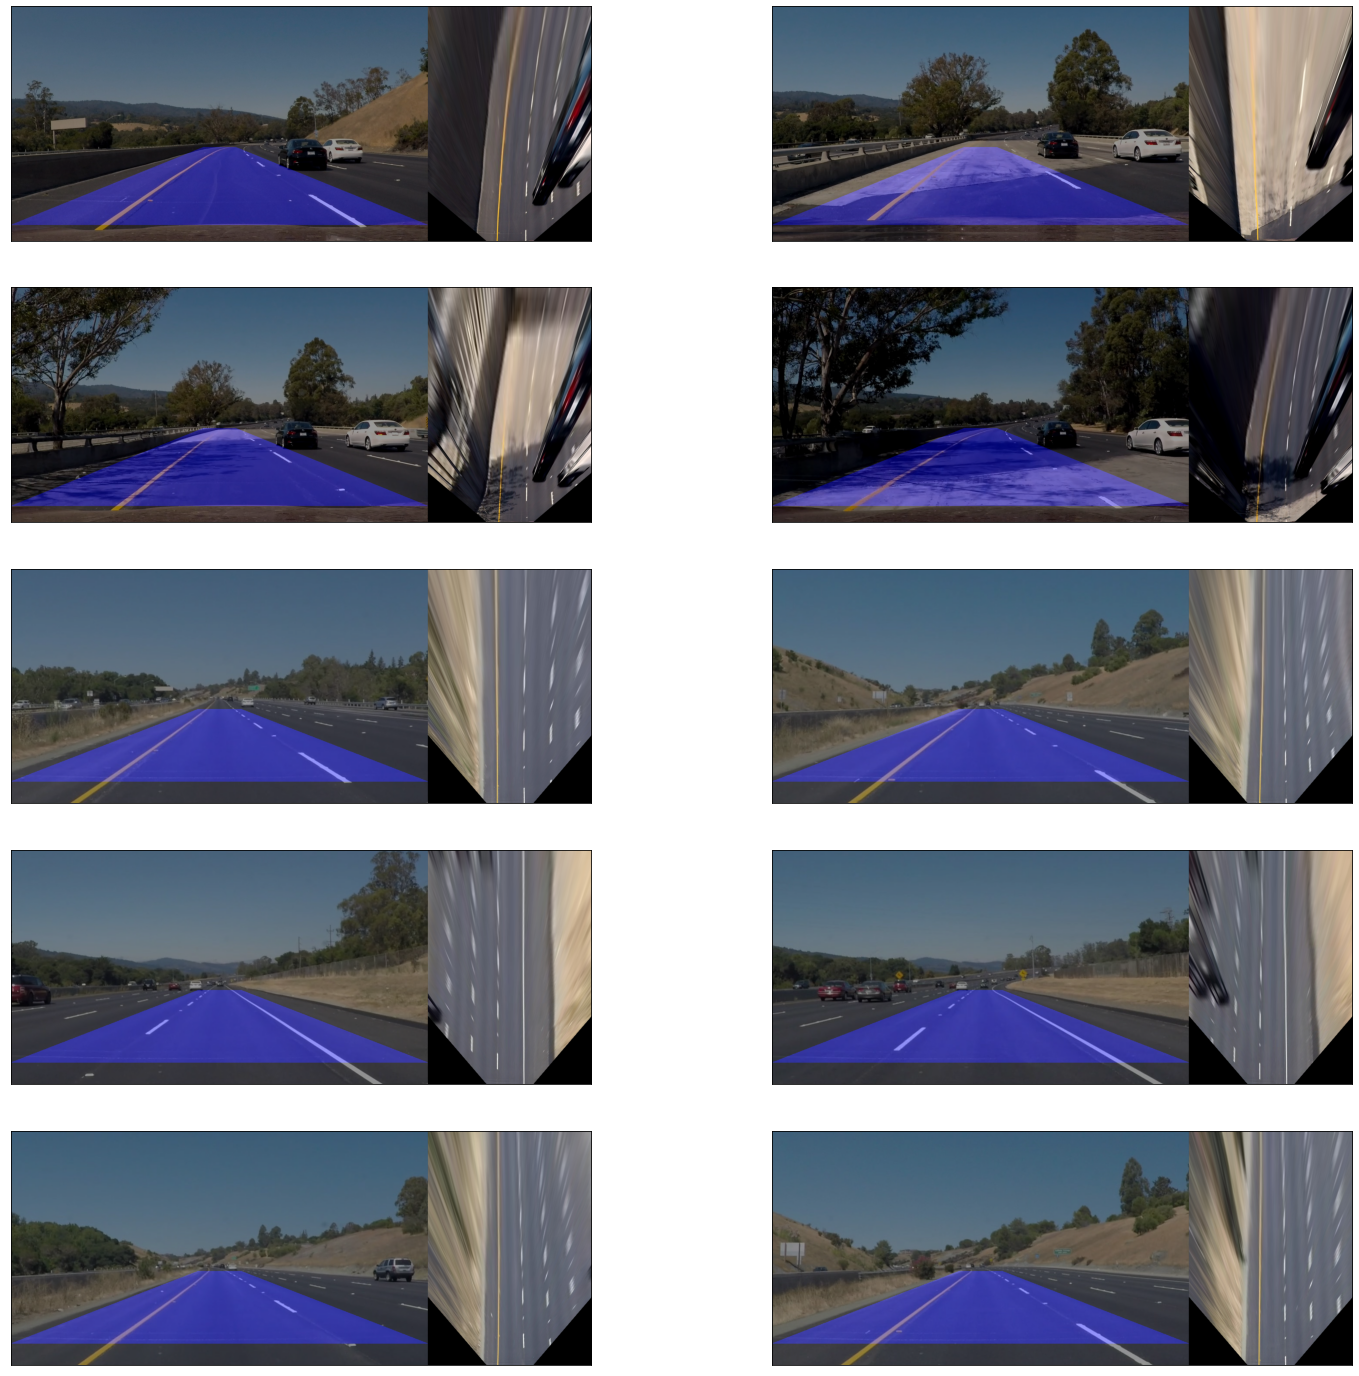

In [2]:
from cv_utils import getBEV

test_images = [plt.imread(path) for path in glob.glob('../data/test_images/*.jpg')]
cols = 2
rows = (len(test_images)+1)//cols

plt.figure(figsize=(25, 25))
for i, image in enumerate(test_images):
    plt.subplot(rows, cols, i+1)
    _, _, cat_show = getBEV(image)
    plt.imshow(cat_show, cmap=None)
    plt.xticks([])
    plt.yticks([])
plt.show()

Depending on the camera angle, the camera height, and the vanishing point the trapezoid's dimensions relative to the image have to be adjusted to produce the desired result. So some trial and error is needed for each specific setup. 